# This notebook will analyse the IntelliRehabDS dataset

## <span style="color:blue">Load the dataset</span>.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

#CHANGE this to the project path for your local machine
sys.path.append('/Users/alina/Documents/Work/SourceCode/intellireahabds/')

import dataio.process_skeleton as sk
from configs import config_seamer as cf


In [2]:
#Load the data
print("Path to data is ", cf.path_dataset)
data, data_info, file_names = sk.process_files(cf.path_dataset)


Path to data is  /Users/alina/Desktop/Perkeso/FinalSkeletonDatasetV2.0/RawData/
Parsing files
Number of ignored files 12


## General data statistics

In [3]:
number_examples = len(data)
print("Total number of considered gestures", len(data))
sk.data_stats(data, data_info)

d = {'correctness': [True]* number_examples, 
     'date': np.zeros([number_examples]), 
     'gesture_type': [""]* number_examples, 
     'patient_id': [""]* number_examples, 
     'position': [""]* number_examples, 
     'repetition_number': np.zeros([number_examples]),
     'length': np.zeros([number_examples])
     }

for i in range(number_examples):
    d['correctness'][i] = (data_info[i].correct == "1")
    d['date'][i] = int(data_info[i].date)
    d['gesture_type'][i] = data_info[i].gesture_type
    d['patient_id'][i] = data_info[i].patient_id
    d['position'][i] = data_info[i].position
    d['repetition_number'][i] = data_info[i].repetition
    d['length'][i] = data[i].shape[0]
            
df = pd.DataFrame(data=d)


Total number of considered gestures 2577
Number correct 2047  with an average length of  68.43185148998535
Number incorrect 530  with an average length of  148.26415094339623


In [4]:
len(df[df['correctness']==False][df['length']>383])



/Users/alina/opt/anaconda3/envs/intellirehabds/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


25

## Draw correct vs incorrect length




Basic information about the length of the sequences
count    2577.000000
mean       84.850601
std        86.911395
min        13.000000
25%        50.000000
50%        64.000000
75%        89.000000
max      1586.000000
Name: length, dtype: float64


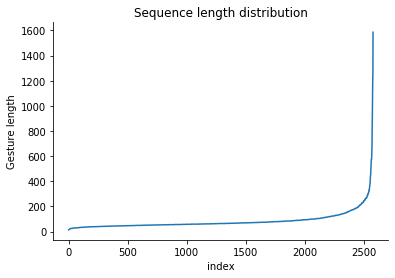

In [5]:
%matplotlib inline
print("Basic information about the length of the sequences")
print(df['length'].describe())
# 
plt.plot(range(df.shape[0]), np.sort(df['length'].values))
plt.xlabel('index')
plt.ylabel('Gesture length')
plt.title("Sequence length distribution")
sns.despine()



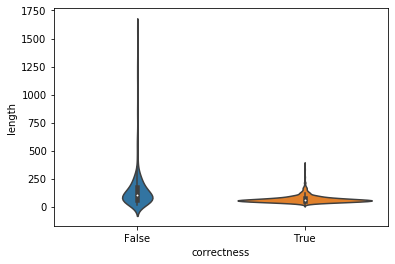

In [6]:
sns.violinplot(x="correctness",y="length",data=df)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alina/Desktop/Article-PerkesoDataset/EDA/Correct_vs_Length.pdf'

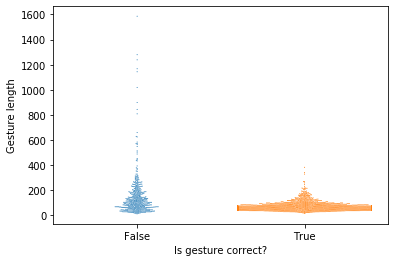

In [7]:
ax_cl = sns.swarmplot(x="correctness",y="length",data=df, size=1)
ax_cl.set(xlabel='Is gesture correct?',ylabel='Gesture length')
plt.savefig(cf.path_output+"Correct_vs_Length.pdf")



In [ ]:
# Define a scatterplot function
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
#%
print(len(df[df['correctness']==True]))
print(len(df[df['correctness']==False]))
scatterplot(df['length'], df['correctness'])
#sns.distplot(df['length'], color='g', bins=100, hist_kws={'alpha': 0.4});



## Average length correct/incorrect per gesture


In [ ]:
ax = sns.swarmplot(x="gesture_type",y="length",hue="correctness",data=df, size = 1.4)
ax.set(xlabel='Gesture label',ylabel='Gesture length')
plt.savefig(cf.path_output+"Correct_vs_Length_per_gesture.pdf")


In [ ]:
print(df.groupby(['gesture_type','correctness'])['length']. mean())



## Posture analysis

### What is the posture distribution?

In [ ]:
import pandas as pd
s = pd.Series(df['position'])
s.value_counts()/len(df)


### What is the posture distribution for healthy vs patients?

In [ ]:
df['Patient'] = df['patient_id'].str.startswith('2')


In [ ]:
print("================Healty================")
s_healty = pd.Series(df[df['Patient']==False]['position'])
print(len(s_healty))
print(s_healty.value_counts())
print(s_healty.value_counts()/len(s_healty))
print("================Patients===============")
s_patient = pd.Series(df[df['Patient']==True]['position'])
print(len(s_patient))
print(s_patient.value_counts())
print(s_patient.value_counts()/len(s_patient))


## Heat map with number of repetitions per patient


In [ ]:
subjects_ids = df['patient_id'].unique()
gestures_ids = df['gesture_type'].unique()

heat_map = np.zeros((len(gestures_ids),len(subjects_ids)))
heat_map_incorrect = np.zeros((len(gestures_ids),len(subjects_ids)))
for idx_s in range(len(subjects_ids)):
    for idx_g in range(len(gestures_ids)):
        heat_map[idx_g][idx_s]= len(df[(df['patient_id']==subjects_ids[idx_s]) & (df['gesture_type']==gestures_ids[idx_g])])
        heat_map_incorrect[idx_g][idx_s]= len(df[(df['patient_id']==subjects_ids[idx_s]) & 
                                       (df['gesture_type']==gestures_ids[idx_g]) &
                                       (df['correctness']==False)])
        
print(heat_map)
print(subjects_ids)

# plt.imshow(heat_map, cmap='hot', interpolation='nearest')
# plt.show()
plt.figure(figsize=(12, 5))
sns.heatmap(heat_map, linewidth=0.7, cmap="BuPu", vmin = 0,  xticklabels=subjects_ids, square=False)
#plt.savefig(cf.path_output+"HeatMapGestures.pdf")
plt.show()

plt.figure(figsize=(12, 5))
sns.heatmap(heat_map_incorrect, linewidth=0.7, cmap="BuPu", vmin = 0,  xticklabels=subjects_ids, square=False)
# plt.savefig(cf.path_output+"HeatMapGesturesIncorrect.pdf")
plt.show()


# count number of repetitions per gesture
sum_incorrect = 0
for idx_g in range(len(gestures_ids)):
    g_correct = len(df[(df['gesture_type']==gestures_ids[idx_g]) & (df['correctness']==True)])
    g_incorrect = len(df[(df['gesture_type']==gestures_ids[idx_g]) & (df['correctness']==False)])
                                        
    sum_incorrect += g_incorrect                           
    print(gestures_ids[idx_g],
          g_correct,
          g_incorrect)
    
print(sum_incorrect, len(df))

# count number of repetitions per gesture where patient
sum_incorrect = 0
for idx_g in range(len(gestures_ids)):
    g_correct = len(df[(df['gesture_type']==gestures_ids[idx_g]) 
                       & (df['correctness']==True)
                       & (df['Patient']==True)])
    g_incorrect = len(df[(df['gesture_type']==gestures_ids[idx_g]) 
                         & (df['correctness']==False)
                        & (df['Patient']==True)])
                                        
    sum_incorrect += g_incorrect                           
    print(gestures_ids[idx_g],
          g_correct,
          g_incorrect)
    
print(sum_incorrect, len(df))

# count number of incorrect repetitions per patient
print("count number of incorrect repetitions per patient")
sum_incorrect = 0
data_inccorect_exec = []
for idx_s in range(len(subjects_ids)):
    g_correct = len(df[(df['patient_id']==subjects_ids[idx_s]) 
                       & (df['correctness']==True)])
    g_incorrect = len(df[(df['patient_id']==subjects_ids[idx_s]) 
                         & (df['correctness']==False)])
                                        
    sum_incorrect += g_incorrect                           
    print(subjects_ids[idx_s],
          g_correct,
          g_incorrect)
    data_inccorect_exec.append(g_incorrect)
    
print(sum_incorrect, len(df))

plt.figure(figsize=(12, 5))
sns.boxplot(subjects_ids, data_inccorect_exec)
plt.show()

    

## Simple Classifiers
### Simple threshold classifier


In [ ]:
sk.simple_threshold_classifier(data,data_info, threshold=150)



## Gesture visualization
### #D gesture visualisation


In [ ]:
def normalize_gesture(gesture):
    norm_x = gesture[0][0]
    norm_y = gesture[0][1]
    norm_z = gesture[0][2]
    for idx_gesture in range(len(gesture)):
        idx_joint = 0
        while idx_joint < len(gesture[0]):
            gesture[idx_gesture][idx_joint] -= norm_x
            gesture[idx_gesture][idx_joint+1] -= norm_y
            gesture[idx_gesture][idx_joint+2] -= norm_z
            idx_joint += 3
        idx_gesture += 1
    return gesture




In [ ]:
def set_ax_limit_skeleton(ax1):
    ax1.clear()
    ax1.set_xlabel('X')
    ax1.set_xlim(-0.5, 0.5)
    ax1.set_ylabel('Y')
    ax1.set_ylim(-1, 1)
    ax1.set_zlabel('Z')
    ax1.set_zlim(0, 2)

def draw_beautiful_skeleton(gesture_data, output_image):

    matplotlib.rcParams.update({'font.size': 6})
    fig = plt.figure(dpi=200, figsize=(6, 7))#figsize=(50, 50))
    ax1 = fig.gca(projection='3d')
    idx = 0

    ax1.view_init(elev=90., azim=-90)
    ax1.set_facecolor('white')

    joint_names = ["SpineBase", "SpineMid", "Neck", "Head", "ShoulderLeft", "ElbowLeft",
                   "WristLeft", "HandLeft", "ShoulderRight", "ElbowRight", "WristRight",
                   "HandRight", "HipLeft", "KneeLeft", "AnkleLeft", "FootLeft",
                   "HipRight",  "KneeRight", "AnkleRight", "FootRight", "SpineShoulder",
                   "HandTipLeft", "ThumbLeft", "HandTipRight", "ThumbRight"]

    # (10, 11) (wristRight, HandRight)
    # (11, 23) (handright, handtipright), (handRight, thumbright)
    # connectivity = [(0, 1), (1, 20), (20, 2), (2, 3), (20, 8), (8, 9), (9, 10), (10, 11), (11, 24), (11, 23),
    #                 (20, 4), (4, 5), (5, 6), (6, 7), (7, 22), (7, 21), (0, 16), (16, 17), (17, 18), (18, 19), (0, 12),
    #                 (12, 13), (13, 14), (14, 15)]

    # Ignore hand joints
    connectivity = [(0, 1), (1, 20), (20, 2), (2, 3), (20, 8), (8, 9), (9, 10), (10, 11), 
                    (20, 4), (4, 5), (5, 6), (6, 7), (0, 16), (16, 17), (17, 18), (18, 19), (0, 12),
                    (12, 13), (13, 14), (14, 15)]

    set_ax_limit_skeleton(ax1)

    fig.tight_layout()
    # for skeleton in [gesture_data[0], gesture_data[10], gesture_data[20]]:
    idx_frame = 0
    downsample = 1 #2
    colors_palette = sns.color_palette("PiYG", int(len(gesture_data)/downsample))
    print(colors_palette)
    for skeleton in gesture_data:
        idx_frame += 1
        # fig.subplots_adjust(left=-0.2, bottom=-0.1)
        if idx_frame % downsample != 0:
            continue

        # plot_joints(ax1, skeleton)
        idx_joint = 0
        joints_size = len(skeleton) - 3*4 # ignore last 4 joints corresponding to hands tip
        while idx_joint < joints_size:
            ax1.scatter(skeleton[idx_joint], skeleton[idx_joint+1], skeleton[idx_joint+2], s=1.5, c=colors_palette[idx])#c=np.random.rand(3,))#c=="red")
            idx_joint += 3
        for connection in connectivity:
            # plot_joint_connections(ax1, connection, joint_names, skeleton)
            joint_info1 = [0]*3
            joint_info1[0] = skeleton[connection[0]*3]
            joint_info1[1] = skeleton[connection[0]*3+1]
            joint_info1[2] = skeleton[connection[0]*3+2]
            joint_info2 = skeleton[connection[1]*3:(connection[1]*3+3)]
            ax1.plot([joint_info1[0], joint_info2[0]],
                     [joint_info1[1], joint_info2[1]],
                     [joint_info1[2], joint_info2[2]], linewidth=1.0, solid_capstyle='round', 
                     c=colors_palette[idx])
        # out_image = output_folder + str(idx) + ".png"
        # fig.savefig(out_image, bbox_inches='tight', dpi=300)
        # files_images.append(out_image)
        idx += 1
        
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.gca().zaxis.set_major_locator(plt.NullLocator())
    fig.savefig(output_image, bbox_inches='tight', dpi=300)
    plt.show()
    
    #toMovie(output_folder, files_images, "skeleton.gif")



In [ ]:
# Select gesture
# correct gesture index: 25, 131, 241, 416, 2389, 2127, 1841, 2503
# incorrect 1207, 1506, 1786, 1664, 757, 995
index_gesture = 995
gesture = data[index_gesture]
print("processing gesture:", index_gesture, file_names[index_gesture])
data_info[index_gesture].print()
# Normalize gesture
gesture = normalize_gesture(gesture)
# Draw skeleton 
print(cf.path_output+file_names[index_gesture]+".pdf")
draw_beautiful_skeleton(gesture,cf.path_output+file_names[index_gesture]+".pdf")





